# <center>STA 142 A Project - Kaggle Titanic Machine Learning Challenge</center>

### Member1: Yuyan Fan 

### Member2:

### Member3:

# I. Introduction(not done yet)

On April 15, 1912, during Tanic's maiden voyage, it sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this report, we will build a  model that answers the question: “what sorts of people were more likely to survive?”

The dataset is from kaggle titanic competition(https://www.kaggle.com/c/titanic)

In this project, we will be...

# II. Methodolog

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [113]:
# load the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [114]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

* There are 891 entries of data and 12 variables.

### Data dictionary

In [6]:
d = {'Variable': train.columns,"Description" : ["Passenger ID","Survived or not. = No, 1 = Yes", 
                                              "Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd",
                                              "Name","Sex","Age","number of siblings or spouses aboard the Titanic",
                                              "number of parents or children aboard the Titanic",
                                              "Ticket number","Passenger fare","Cabin number",
                                              "Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton."]}
df_dis = pd.DataFrame(data = d)
df_dis

,Variable,Description
0,PassengerId,Passenger ID
1,Survived,"Survived or not. = No, 1 = Yes"
2,Pclass,"Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd"
3,Name,Name
4,Sex,Sex
5,Age,Age
6,SibSp,number of siblings or spouses aboard the Titanic
7,Parch,number of parents or children aboard the Titanic
8,Ticket,Ticket number
9,Fare,Passenger fare


### Description of numeric data

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Description of categorical data

In [8]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


(Description of algorithms)

# III. Implementation Details

## 1. Data Preparation

### Drop meaningless variables

In [115]:
train = train.drop(columns=['PassengerId', 'Name', 'Ticket','Cabin'])

In [116]:
test = test.drop(columns=['PassengerId', 'Name', 'Ticket','Cabin'])

* PassengerI, Cabin and Ticket are ID made of rndom numbers, so we dropped them.
* Name cannot make a difference to survival rate, so we dropped it as well.

### Missing values

In [117]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [118]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

* There are many missing values in 'Age', but we cannot simply drop the missing values, or even the variable,since that would make us lose $\frac{177}{891}$ = 19.9% training data. 
* After doing a little research online on how to handle missing values, we decided to impute missing 'Age' with the mean of age.
* Dropping missing values in other variables would be fine, because there are not many.

In [119]:
train['Age'].fillna(int(train['Age'].mean()), inplace=True)# refill na with variable mean
test['Age'].fillna(int(test['Age'].mean()), inplace=True)

In [120]:
train.dropna()# drop na
test.dropna()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,30.0,0,0,8.0500,S


### Data converting

In [125]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

* Our algorithm cannot deal with catagorical values, so we convert them into numeric ones.
* Sex: 1 = male; 0 = female
* Embarked: 1 = Q; 2 = S; 3 = C

In [15]:
# sex
def sex_con(data):
    for i in range(len(data['Sex'])):
        if data['Sex'][i] == 'male':
            data['Sex'][i] = 1
        else:
            data['Sex'][i] = 0
    
    return data.Sex.astype(int)        

In [16]:
sex_con(train)
sex_con(test)

/var/folders/zt/ylvcxvkn4dldmv6s_lqsrf1c0000gn/T/ipykernel_44620/1305294579.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'][i] = 1
/var/folders/zt/ylvcxvkn4dldmv6s_lqsrf1c0000gn/T/ipykernel_44620/1305294579.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'][i] = 0


0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int64

In [17]:
# embarked
for i in range(len(train['Embarked'])):
    if train['Embarked'][i] == 'Q':
        train['Embarked'][i] = 1
    elif train['Embarked'][i] == 'S':
        train['Embarked'][i] = 2
    else:
        train['Embarked'][i] = 3
train.Embarked.astype(int)        

/var/folders/zt/ylvcxvkn4dldmv6s_lqsrf1c0000gn/T/ipykernel_44620/3548576544.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Embarked'][i] = 2
/var/folders/zt/ylvcxvkn4dldmv6s_lqsrf1c0000gn/T/ipykernel_44620/3548576544.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Embarked'][i] = 3
/var/folders/zt/ylvcxvkn4dldmv6s_lqsrf1c0000gn/T/ipykernel_44620/3548576544.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train

0      2
1      3
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    3
890    1
Name: Embarked, Length: 891, dtype: int64

In [18]:
for i in range(len(test['Embarked'])):
    if test['Embarked'][i] == 'Q':
        test['Embarked'][i] = 1
    elif test['Embarked'][i] == 'S':
        test['Embarked'][i] = 2
    else:
       test['Embarked'][i] = 3
            
test.Embarked.astype(int)    

/var/folders/zt/ylvcxvkn4dldmv6s_lqsrf1c0000gn/T/ipykernel_44620/4200319273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Embarked'][i] = 1
/var/folders/zt/ylvcxvkn4dldmv6s_lqsrf1c0000gn/T/ipykernel_44620/4200319273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Embarked'][i] = 2
/var/folders/zt/ylvcxvkn4dldmv6s_lqsrf1c0000gn/T/ipykernel_44620/4200319273.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['E

0      1
1      2
2      1
3      2
4      2
      ..
413    2
414    3
415    2
416    2
417    3
Name: Embarked, Length: 418, dtype: int64

## 2. Exploratory Data Analysis

### Correlation between the variables

In [19]:
corr = train.corr() # shows only numerical variables
corr = corr.replace(1.0, np.nan)
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,NaN,-0.338481,-0.067814,-0.035322,0.081629,0.257307
Pclass,-0.338481,NaN,-0.334974,0.083081,0.018443,-0.549500
Age,-0.067814,-0.334974,NaN,-0.232978,-0.176486,0.093706
SibSp,-0.035322,0.083081,-0.232978,NaN,0.414838,0.159651
Parch,0.081629,0.018443,-0.176486,0.414838,NaN,0.216225
Fare,0.257307,-0.549500,0.093706,0.159651,0.216225,NaN


<AxesSubplot:>

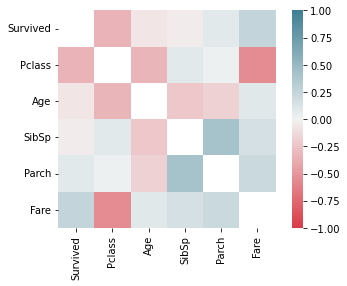

In [20]:
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, vmin=-1.0, vmax=1.0, square=True, cmap=cmap)

In [21]:
corr.min() # negative correlations

Survived   -0.338481
Pclass     -0.549500
Age        -0.334974
SibSp      -0.232978
Parch      -0.176486
Fare       -0.549500
dtype: float64

In [22]:
print(corr.min().idxmin(), corr[corr.min().idxmin()].idxmin()) # the most negative correlation
corr.min().min()

Pclass Fare


-0.5494996199439076

In [23]:
print(corr.max().idxmax(), corr[corr.max().idxmax()].idxmax()) # the most positive correlation
corr.max().max()

SibSp Parch


0.41483769862015624

* Pclass and Fare are highly correlated with the negative correlation -0.5495.
* SibSp and Parch are highly correlated with the positive correlation 0.4148.

### Analysis on each variable

### Pclass

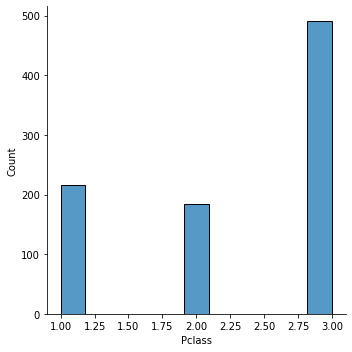

In [24]:
sns.displot(train,x='Pclass') #histogram of Pclass Variable

In [25]:
train.groupby(by="Pclass").mean().iloc[:,0] 

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

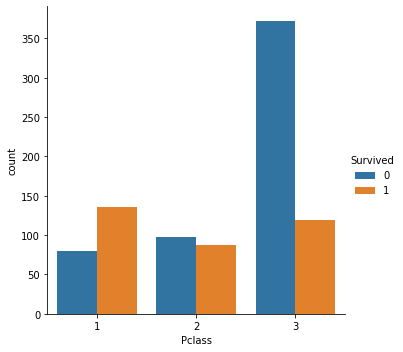

In [26]:
sns.catplot(x='Pclass',hue='Survived',data=train,kind="count") #histogram of Pclass based on Survival

* It seems that around the same amount from each class survived, but more people in the $3^{rd}$ ticket class has the lowest survival rate.

## Sex

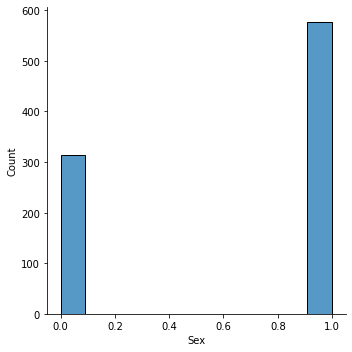

In [27]:
sns.displot(train,x='Sex') #histogram of Sex Variable

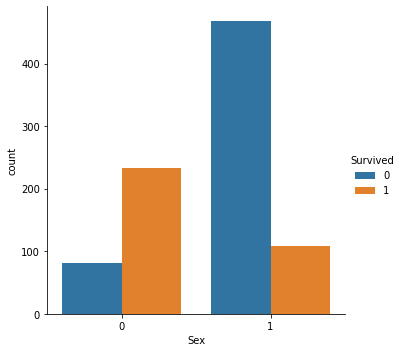

In [28]:
sns.catplot(x='Sex',hue='Survived',data=train,kind="count") #histogram of Sex based on Survival

* Females had a higher proportion of survival.

## Age

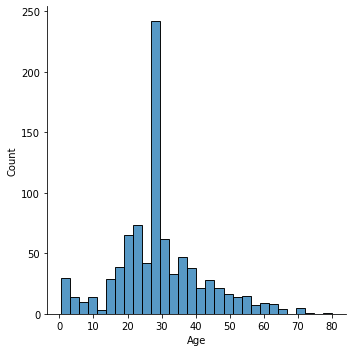

In [29]:
sns.displot(train,x='Age') #histogram of Sex Variable

<AxesSubplot:xlabel='Survived', ylabel='Age'>

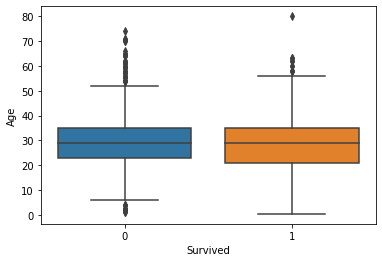

In [30]:
sns.boxplot(x='Survived',y='Age', data = train) #box plot of Age separated by whether they survived or not

* Both of the boxplots look similar to one another. But if we divide age into different age groups, the survival rate of different groups vary and the differences are noticeable.

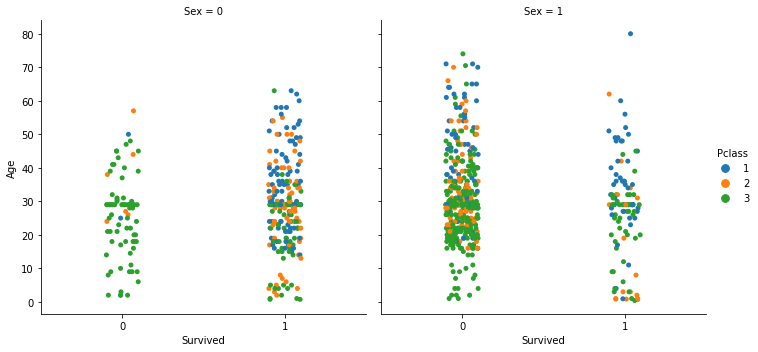

In [32]:
#sns.scatterplot(x='Age', y='Survived', data=new_train,hue='Pclass', style='Sex')
sns.catplot(y='Age',x='Survived',col='Sex',hue='Pclass',data=train)

# not sure how to interpret this plot

In [33]:
# convert train age
for i in range(len(train)):
    if train['Age'][i] <= 20:
        train['Age'][i] = 0
    elif train['Age'][i] <= 40:
        train['Age'][i] = 1
    elif train['Age'][i] <= 65:
        train['Age'][i] = 2
    else:
        train['Age'][i] = 3
train.Age.astype(int)       

/var/folders/zt/ylvcxvkn4dldmv6s_lqsrf1c0000gn/T/ipykernel_44620/475378595.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][i] = 1
/var/folders/zt/ylvcxvkn4dldmv6s_lqsrf1c0000gn/T/ipykernel_44620/475378595.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][i] = 2
/var/folders/zt/ylvcxvkn4dldmv6s_lqsrf1c0000gn/T/ipykernel_44620/475378595.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][i] = 

0      1
1      1
2      1
3      1
4      1
      ..
886    1
887    0
888    1
889    1
890    1
Name: Age, Length: 891, dtype: int64

In [34]:
# convert test age
for i in range(len(test)):
    if test['Age'][i] <= 20:
        test['Age'][i] = 0
    elif test['Age'][i] <= 40:
        test['Age'][i] = 1
    elif test['Age'][i] <= 65:
        test['Age'][i] = 2
    else:
        test['Age'][i] = 3
test.Age.astype(int) 

/var/folders/zt/ylvcxvkn4dldmv6s_lqsrf1c0000gn/T/ipykernel_44620/2587309143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][i] = 1
/var/folders/zt/ylvcxvkn4dldmv6s_lqsrf1c0000gn/T/ipykernel_44620/2587309143.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][i] = 2
/var/folders/zt/ylvcxvkn4dldmv6s_lqsrf1c0000gn/T/ipykernel_44620/2587309143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][i] = 

0      1
1      2
2      2
3      1
4      1
      ..
413    1
414    1
415    1
416    1
417    1
Name: Age, Length: 418, dtype: int64

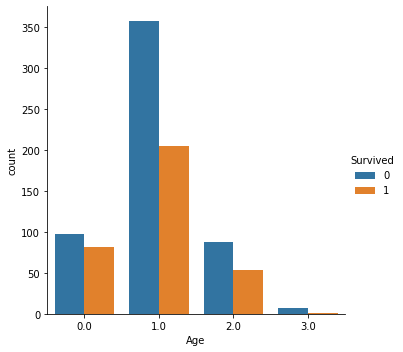

In [35]:
sns.catplot(x='Age',hue='Survived',data=train,kind="count")

In [36]:
train.groupby(by="Age").mean().iloc[:,0] # survival rate for age groups

Age
0.0    0.458101
1.0    0.364769
2.0    0.380282
3.0    0.125000
Name: Survived, dtype: float64

* Group 3(65+ year old) has the lowest survival rate. Elder people are less likely to survive the harsh environment.
* Group 1(0-20 year old) has the highest survival rate. When emegency happens, people tend to let young people go first.

## Fare

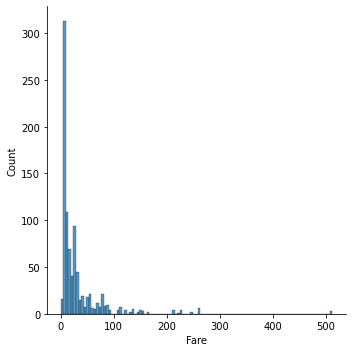

In [38]:
sns.displot(train,x='Fare') #histogram of Fare Variable

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

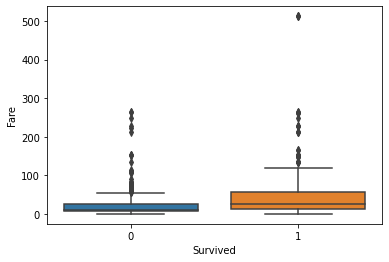

In [39]:
sns.boxplot(x='Survived',y='Fare', data = train) #box plot of Fare separated by whether they survived or not

In [40]:
train.groupby(by="Survived").mean().iloc[:,4] # average fare for survived and not 

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

Survival seems to favor the higher fares.

## Embarked
1 = Q; 2 = S; 3 = C

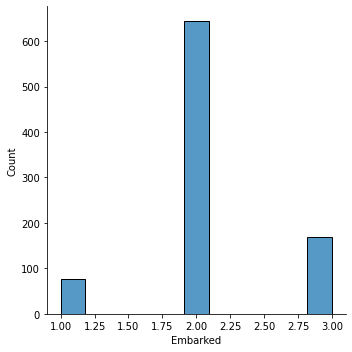

In [41]:
sns.displot(train,x='Embarked')

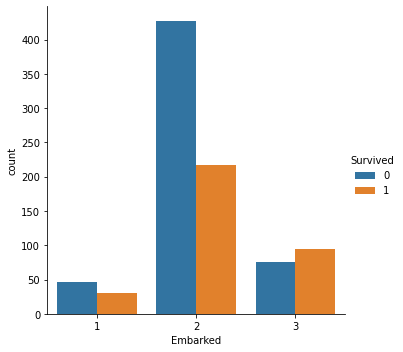

In [42]:
sns.catplot(x='Embarked',hue='Survived',data = train,kind="count") #histogram of Embarked based on Survival

In [43]:
train.groupby(by="Embarked").mean().iloc[:,0] # Embarked and survival rate

Embarked
1    0.389610
2    0.336957
3    0.558824
Name: Survived, dtype: float64

The only significant difference in proportion is when the Port of Embartkation was in Cherbourg, and it has higher survival rate.

## Sibsp and Parch

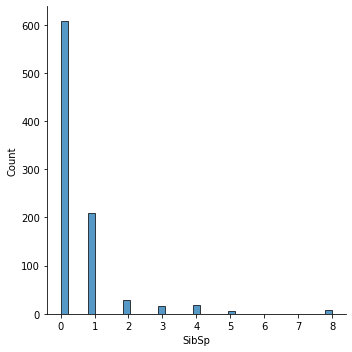

In [44]:
sns.displot(train,x='SibSp')

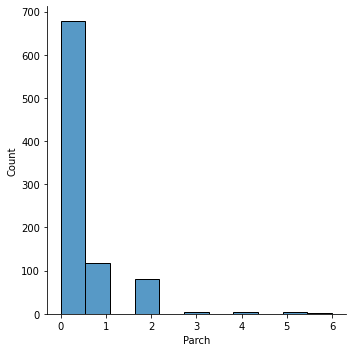

In [45]:
sns.displot(train,x='Parch')

* parch and sibsp are all number of family, so we can sum them up.

In [46]:
train['family'] = train['SibSp'] + train['Parch']
test['family'] = test['SibSp']+test['Parch']

In [47]:
test = test.drop(columns=['Parch','SibSp'])
train = train.drop(columns=['Parch','SibSp'])

In [48]:
train.groupby(by="Survived").mean().iloc[:,3] # average family size for survived and not survived passenger

Survived
0    0.883424
1    0.938596
Name: family, dtype: float64

In [ ]:
train.groupby(by="family").mean().iloc[:,0] # family size and survival rate 

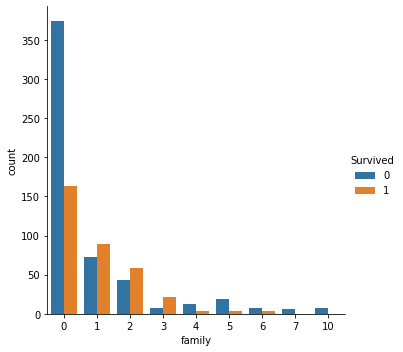

In [49]:
sns.catplot(x='family',hue='Survived',data = train,kind="count") 

* It seems that being alone is related to lower survival rate.
* But larger family size doesn't mean higher survival rate. Having a family of 3 seems to be the best one.

### Interpretation:


## 3. Building models
Instead of using Python package, we will build our own functions. This is the biggest challenge of our project.

In [50]:
x = train.iloc[:,1:7]
y = train.iloc[:,0]
x_test = test

In [109]:
x_test = test
x_test.shape

(418, 6)

In [73]:
# convert type-> int
x['Age'] = x['Age'].astype(np.int64)
x['Sex'] = x['Sex'].astype(np.int64)
x['Fare'] = x['Fare'].astype(np.int64)
x['Embarked'] = x['Embarked'].astype(np.int64)

In [108]:
x_test['Age'] = x_test['Age'].astype(np.int64)
x_test['Sex'] = x_test['Sex'].astype(np.int64)
x_test['Fare'] = x_test['Fare'].astype(np.int64)
x_test['Embarked'] = x_test['Embarked'].astype(np.int64)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

### Logstic Regression

In [54]:
# define the functiona
def fit(x, y,learning_rate,iterations): 
    m,n = x.shape
    weight = np.zeros(n)
    b0 = 0
    for i in range(iterations): 
        y_hat = sigmoid(np.dot(x, weight) + b0)
        loss = -1/m * np.sum(y * np.log(y_hat)) + (1 - y) * np.log(1-y_hat)
        dW = 1/m * np.dot(x.T, (y_hat - y))
        db = 1/m * np.sum(y_hat - y)
        weight -= learning_rate * dW
        b0 -= learning_rate * db 
    return weight, b0

def sigmoid(input):    
    output = 1 / (1 + np.exp(-input))
    return output

* learning_rate = 0.02, iteration = 1000

In [55]:
fit(x, y,0.02,1000)

/var/folders/zt/ylvcxvkn4dldmv6s_lqsrf1c0000gn/T/ipykernel_44620/1588114900.py:8: RuntimeWarning: divide by zero encountered in log
  loss = -1/m * np.sum(y * np.log(y_hat)) + (1 - y) * np.log(1-y_hat)


(array([-0.26218325, -1.69748202, -0.53902301,  0.06175825,  0.12015686,
        -0.63356564]),
 -0.003218951360443525)

In [ ]:
parameter = fit(x, y,0.02,1000)
predict = np.dot(x_test, parameters_out[0]) + parameters_out[1]

* learning_rate = 0.02, iteration = 1000

In [ ]:
fit(x, y,0.02,500)

In [ ]:
parameter = fit(x, y,0.02,1000)
predict = np.dot(x_test, parameters_out[0]) + parameters_out[1]